In [162]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# 스케줄이랑 기본 모델링 전처리했던 df_feat이랑 합치기

In [204]:
df_list = pd.read_csv("/Users/isla/Documents/final_project/EJ/real_fina_time_series/df_feat.csv")

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.pr

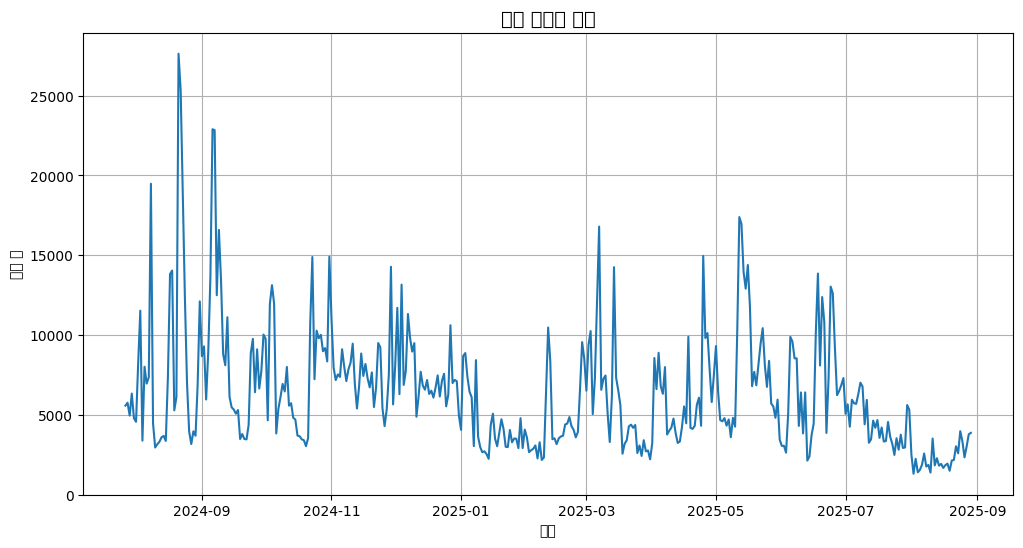

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# df1_2 구성 예시
df1_2 = df_list[['rpt_time_date', 'turn_sum']].copy()

# 날짜를 datetime 변환 (안 하면 x축이 문자열로 나올 수 있음)
df1_2['rpt_time_date'] = pd.to_datetime(df1_2['rpt_time_date'])

# 일별 합계
df_daily_sum = df1_2.groupby("rpt_time_date", as_index=False)["turn_sum"].sum()

# 그래프 그리기
plt.figure(figsize=(12,6))
plt.plot(df_daily_sum["rpt_time_date"], df_daily_sum["turn_sum"],linestyle="-")
plt.title("일별 전환수 추이", fontsize=14)
plt.xlabel("날짜")
plt.ylabel("전환 수")
plt.grid(True)
plt.show()


In [164]:
df_list = df_list[['rpt_time_date', 'unique_id', 'turn_sum', 'ads_idx', 'mda_idx',
       'ads_category_id', 'domain', 'flag', 'turn_day_count']]

In [165]:
df_schedule = pd.read_csv("/Users/isla/Documents/final_project/EJ/real_fina_time_series/스케줄데이터.csv")


In [166]:

# 1. 쉼표 기준으로 split → 리스트 만들기
df_schedule['mda_idx_arr'] = df_schedule['mda_idx_arr'].astype(str).str.split(',')

# 2. 리스트를 행으로 분리
df_schedule = df_schedule.explode('mda_idx_arr')

# 3. 공백 제거 + 숫자로 변환 (원하면)
df_schedule['mda_idx_arr'] = df_schedule['mda_idx_arr'].str.strip()
df_schedule['mda_idx_arr'] = pd.to_numeric(df_schedule['mda_idx_arr'], errors='coerce')

df_tab=df_schedule[['ads_idx','mda_idx_arr','sch_type','sch_clk_num','sch_sdatetime','sch_edatetime','sch_adv_pay','sch_ads_pay','sch_mda_pay']]

In [167]:
df_schedule.columns

Index(['sch_idx', 'ads_idx', 'sch_type', 'mda_idx_arr', 'sch_sdatetime',
       'sch_edatetime', 'sch_adv_pay', 'sch_ads_pay', 'sch_mda_pay',
       'sch_clk_num', 'sch_turn_num'],
      dtype='object')

In [211]:
# 1. 기존 데이터 (광고-매체 조합)
df_existing = df_list.copy()

# df_schedule = df_schedule.explode('mda_idx_arr').rename(columns={'mda_idx_arr':'mda_idx'})

# 2. 스케줄 데이터 분리
df_M = df_schedule[df_schedule['sch_type'] == 'M'][['ads_idx','mda_idx','sch_clk_num']]
df_A = df_schedule[df_schedule['sch_type'] == 'A'][['ads_idx','sch_clk_num']].rename(columns={'sch_clk_num':'goal_A'})

# 3. M타입 매칭 (ads_idx + mda_idx)
df_result = df_existing.merge(df_M, on=['ads_idx','mda_idx'], how='left')
df_result = df_result.rename(columns={'sch_clk_num':'goal_M'})

# 4. A타입 매칭 (ads_idx만 기준)
df_A = df_A.groupby('ads_idx', as_index=False).first()

df_result = df_result.merge(df_A, on='ads_idx', how='left')

# 5. 최종 goal 결정
# - goal_M 값이 있으면 그걸 사용
# - 없으면 goal_A 값 사용
df_result['goal_final'] = df_result['goal_M'].combine_first(df_result['goal_A'])

# 6. 정리za
df_result = df_result.drop(columns=['goal_M','goal_A'])


/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.pr

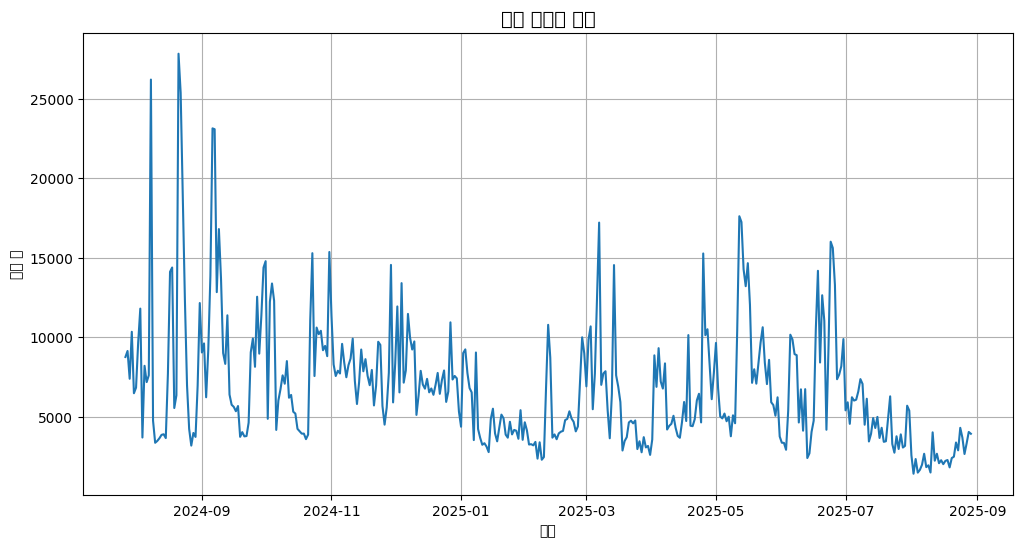

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# df1_2 구성 예시
df1_2 = df_result[['rpt_time_date', 'turn_sum']].copy()

# 날짜를 datetime 변환 (안 하면 x축이 문자열로 나올 수 있음)
df1_2['rpt_time_date'] = pd.to_datetime(df1_2['rpt_time_date'])

# 일별 합계
df_daily_sum = df1_2.groupby("rpt_time_date", as_index=False)["turn_sum"].sum()

# 그래프 그리기
plt.figure(figsize=(12,6))
plt.plot(df_daily_sum["rpt_time_date"], df_daily_sum["turn_sum"],linestyle="-")
plt.title("일별 전환수 추이", fontsize=14)
plt.xlabel("날짜")
plt.ylabel("전환 수")
plt.grid(True)
plt.show()


In [213]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        dtype_name = df[col].dtype.name

        # object, datetime은 건너뛰기
        if dtype_name == 'object' or 'datetime' in dtype_name:
            continue
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int'):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif dtype_name.startswith('float'):
            df[col] = pd.to_numeric(df[col], downcast='float')

    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


df_result = downcast(df_result)

52.1% 압축됨


## 날짜 설정부분

In [172]:
df_listup = pd.read_csv('/Users/isla/Documents/final_project/EJ/real_fina_time_series/df_list_v1.csv')

/var/folders/hl/90p2p86n5cs6t3p_1xwxdx2r0000gn/T/ipykernel_33470/1098902157.py:1: DtypeWarning: Columns (12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listup = pd.read_csv('/Users/isla/Documents/final_project/EJ/real_fina_time_series/df_list_v1.csv')


In [187]:
df_listup['ads_edate'].describe()

count                  445260
unique                   2348
top       9999-12-31 23:59:59
freq                   428202
Name: ads_edate, dtype: object

In [173]:
df_listup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445260 entries, 0 to 445259
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ads_idx             445260 non-null  int64  
 1   ads_code            445260 non-null  object 
 2   aff_idx             445260 non-null  int64  
 3   adv_idx             445260 non-null  int64  
 4   sch_idx             445260 non-null  int64  
 5   ads_type            445260 non-null  int64  
 6   ads_category        445260 non-null  int64  
 7   ads_name            445260 non-null  object 
 8   ads_search          445258 non-null  object 
 9   ads_icon_img        445255 non-null  object 
 10  ads_summary         438199 non-null  object 
 11  ads_guide           444957 non-null  object 
 12  ads_limit           543 non-null     object 
 13  ads_payment         2335 non-null    object 
 14  ads_save_way        444746 non-null  object 
 15  ads_day_cap         445260 non-nul

In [214]:
df_listup = df_listup[['ads_idx', 'ads_edate']]

In [215]:
df_merged = df_result.merge(df_listup, on='ads_idx', how='left')


In [216]:
df_merged['ads_edate'].isna().sum()

0

In [217]:

import datetime
import pandas as pd

# 광고 종료일 변환
df_merged['ads_edate'] = pd.to_datetime(df_merged['ads_edate'], errors='coerce')

# 2025-08-29 이후 종료되는 광고만
compare_date = datetime.date(2025, 8, 29)

df_merged = df_merged[
    (df_merged['ads_edate'].dt.date >= compare_date)
]


In [218]:
print(df_merged['ads_idx'].nunique())
print(df_merged['mda_idx'].nunique())

1659
322


In [219]:
df_merged['ads_edate'].describe()

count                          6530505
mean     2030-03-12 18:56:28.798931456
min                2025-08-29 00:00:00
25%                2029-11-29 00:00:00
50%                2029-11-29 00:00:00
75%                2030-12-27 00:00:00
max                2041-01-05 00:00:00
Name: ads_edate, dtype: object

In [179]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57141380 entries, 0 to 57141379
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   rpt_time_date    object        
 1   unique_id        int64         
 2   turn_sum         float32       
 3   ads_idx          float32       
 4   mda_idx          float32       
 5   ads_category_id  float32       
 6   domain           int8          
 7   flag             int8          
 8   turn_day_count   int16         
 9   goal_final       float64       
 10  ads_edate        datetime64[ns]
dtypes: datetime64[ns](1), float32(4), float64(1), int16(1), int64(1), int8(2), object(1)
memory usage: 2.8+ GB


# df1_1

In [284]:
df_list = df_merged.copy()

In [221]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530505 entries, 0 to 6530504
Data columns (total 36 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   rpt_time_date                           object        
 1   unique_id                               int64         
 2   turn_sum                                float32       
 3   ads_idx                                 float32       
 4   mda_idx                                 float32       
 5   ads_category_id                         float32       
 6   domain                                  int8          
 7   flag                                    int8          
 8   turn_day_count                          int16         
 9   turn_sum_lag1                           float32       
 10  turn_sum_lag2                           float32       
 11  turn_sum_lag3                           float32       
 12  turn_day_count_lag1                     fl

In [285]:
domain_mapping = {'0': '금융/보험', '1': '게임', '2': '상품소비', '3': '생활서비스', '4': '플랫폼', '5': 'SNS/커뮤니케이션',
                  '6': '콘텐츠', '7': '앱테크/리워드', '8': '유틸리티/툴', '9': '지역/상점', '10': '기타'}
df_list['domain'] = df_list['domain'].astype(str).map(domain_mapping)
df_list['domain'] = df_list['domain'].astype('category')

In [293]:
df_grouped = (
    df_list
    .groupby(["ads_idx", "mda_idx"], as_index=False)
    .agg({
        "turn_sum": "sum",
        "domain": "first",              # 첫 번째 값
        "ads_edate": "first",       # 첫 번째 값a
        "goal_final": "first"    # 첫 번째 값
    })
    .rename(columns={
    "ads_idx": "광고ID",
    "mda_idx": "매체ID",
    "turn_sum": "누적 전환 수",
    "domain": "도메인",
    "ads_edate": "광고 종료일",
    "goal_final": "목표 전환 수"
})
)

In [224]:
df_grouped

,광고ID,매체ID,누적 전환 수,도메인,광고 종료일,목표 전환 수
0,2595.0,54.0,33.0,생활서비스,2030-12-27,9999999.0
1,2595.0,246.0,3.0,생활서비스,2030-12-27,9999999.0
2,2595.0,270.0,18.0,생활서비스,2030-12-27,9999999.0
3,2595.0,290.0,0.0,생활서비스,2030-12-27,9999999.0
4,2595.0,337.0,19.0,생활서비스,2030-12-27,9999999.0
...,...,...,...,...,...,...
24950,438699.0,634.0,0.0,상품소비,2030-12-28,9999999.0
24951,438699.0,790.0,0.0,상품소비,2030-12-28,9999999.0
24952,438699.0,854.0,0.0,상품소비,2030-12-28,9999999.0
24953,438942.0,270.0,0.0,생활서비스,2031-01-03,9999999.0


In [225]:
df_grouped['광고 종료일'].isna().sum()
#21951

0

In [ ]:
# 광고 종료일 처리
df_grouped["광고 종료일"] = df_grouped["광고 종료일"].astype(str)
df_grouped.loc[df_grouped["광고 종료일"] > "2060-01-01", "광고 종료일"] = "기한없음"

# 목표 전환 수 처리
df_grouped.loc[df_grouped["목표 전환 수"] > 99999, "목표 전환 수"] = "제한없음"


In [228]:
# print(df_grouped['unique_id'].nunique())
print(df_grouped['광고ID'].nunique())
print(df_grouped['매체ID'].nunique())

1659
322


In [229]:
df_grouped['목표 전환 수'].unique()

array(['제한없음', 3500.0, 50.0, 999.0, 700.0, 100.0, 5100.0, 26998.0,
       10000.0, 3715.0, 5000.0, 3.0, 500.0, 1000.0, nan, 99.0, 350.0,
       2000.0, 40.0, 2482.0, 1.0], dtype=object)

In [230]:
def convert_num(x):
    try:
        return int(float(x))  # 숫자면 정수 변환
    except:
        return x             # 숫자가 아니면 원래 값 그대로

df_grouped["목표 전환 수"] = df_grouped["목표 전환 수"].apply(convert_num)

# def format_value(x):
#     try:
#         # 문자열일 경우 콤마 제거
#         if isinstance(x, str):
#             x_clean = x.replace(",", "")
#             if x_clean.isdigit():
#                 return f"{int(x_clean):,}"
#             else:
#                 return x  # "제한없음" 같은 값은 그대로
#         # 숫자면 천단위 콤마 붙여서 반환
#         return f"{int(x):,}"
#     except:
#         return x

df_grouped["누적 전환 수"] = df_grouped["누적 전환 수"].astype(int)

df_grouped['광고ID'] = pd.to_numeric(df_grouped['광고ID'], errors='coerce').astype('Int64')
df_grouped['매체ID'] = pd.to_numeric(df_grouped['매체ID'], errors='coerce').astype('Int64')


In [231]:
df_grouped["목표 전환 수"] = df_grouped["목표 전환 수"].replace([0, 1, 3], "제한없음")
df_grouped["목표 전환 수"] = df_grouped["목표 전환 수"].fillna("제한없음")

In [232]:
df_grouped

,광고ID,매체ID,누적 전환 수,도메인,광고 종료일,목표 전환 수
0,2595,54,33,생활서비스,2030-12-27 00:00:00,제한없음
1,2595,246,3,생활서비스,2030-12-27 00:00:00,제한없음
2,2595,270,18,생활서비스,2030-12-27 00:00:00,제한없음
3,2595,290,0,생활서비스,2030-12-27 00:00:00,제한없음
4,2595,337,19,생활서비스,2030-12-27 00:00:00,제한없음
...,...,...,...,...,...,...
24950,438699,634,0,상품소비,2030-12-28 00:00:00,제한없음
24951,438699,790,0,상품소비,2030-12-28 00:00:00,제한없음
24952,438699,854,0,상품소비,2030-12-28 00:00:00,제한없음
24953,438942,270,0,생활서비스,2031-01-03 00:00:00,제한없음


In [300]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        dtype_name = df[col].dtype.name

        # object, datetime은 건너뛰기
        if dtype_name == 'object' or 'datetime' in dtype_name:
            continue
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int'):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif dtype_name.startswith('float'):
            df[col] = pd.to_numeric(df[col], downcast='float')

    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


df_grouped = downcast(df_grouped)

0.0% 압축됨


In [301]:
df_grouped.to_csv("df1_1.csv", index=False)

# df1_2

In [234]:
df_list = df_merged.copy()

In [235]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530505 entries, 0 to 6530504
Data columns (total 36 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   rpt_time_date                           object        
 1   unique_id                               int64         
 2   turn_sum                                float32       
 3   ads_idx                                 float32       
 4   mda_idx                                 float32       
 5   ads_category_id                         float32       
 6   domain                                  int8          
 7   flag                                    int8          
 8   turn_day_count                          int16         
 9   turn_sum_lag1                           float32       
 10  turn_sum_lag2                           float32       
 11  turn_sum_lag3                           float32       
 12  turn_day_count_lag1                     fl

In [236]:
df1_2 = df_list[['rpt_time_date', 'turn_sum', 'ads_idx', 'mda_idx']]

In [302]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        dtype_name = df[col].dtype.name

        # object, datetime은 건너뛰기
        if dtype_name == 'object' or 'datetime' in dtype_name:
            continue
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int'):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif dtype_name.startswith('float'):
            df[col] = pd.to_numeric(df[col], downcast='float')

    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


df1_2 = downcast(df1_2)

0.0% 압축됨


In [305]:
import pandas as pd
import numpy as np

def reduce_memory_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"초기 메모리 사용량: {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and str(col_type) != "datetime64[ns]":
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith("int"):
                if c_min >= np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min >= np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min >= np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min >= np.finfo(np.float16).min and c_max <= np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min >= np.finfo(np.float32).min and c_max <= np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print(f"최종 메모리 사용량: {end_mem:.2f} MB (절감률 {(100*(start_mem-end_mem)/start_mem):.1f}%)")
    return df


df1_2 = reduce_memory_usage(df1_2)


초기 메모리 사용량: 74.74 MB
최종 메모리 사용량: 62.28 MB (절감률 16.7%)


In [307]:
df1_2.to_parquet("df1_2.parquet", index=False, compression="snappy")

In [306]:
df1_2.to_csv("df1_2.csv", index=False)

In [238]:
df1_2['turn_sum'].describe()

count    6.530505e+06
mean     4.186477e-01
std      1.220212e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.482000e+03
Name: turn_sum, dtype: float64

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.pr

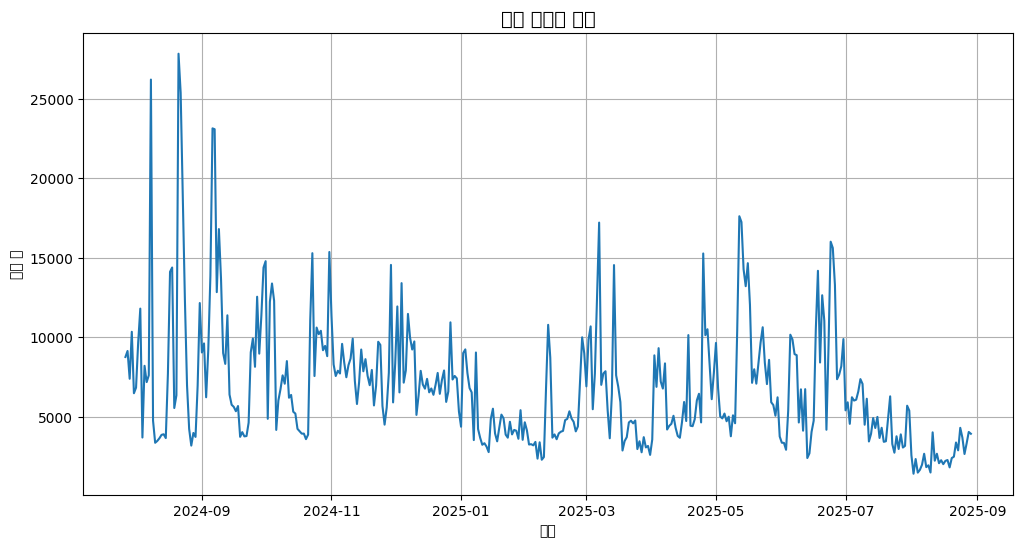

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

# df1_2 구성 예시
df1_2 = df_merged[['rpt_time_date', 'turn_sum']].copy()

# 날짜를 datetime 변환 (안 하면 x축이 문자열로 나올 수 있음)
df1_2['rpt_time_date'] = pd.to_datetime(df1_2['rpt_time_date'])

# 일별 합계
df_daily_sum = df1_2.groupby("rpt_time_date", as_index=False)["turn_sum"].sum()

# 그래프 그리기
plt.figure(figsize=(12,6))
plt.plot(df_daily_sum["rpt_time_date"], df_daily_sum["turn_sum"],linestyle="-")
plt.title("일별 전환수 추이", fontsize=14)
plt.xlabel("날짜")
plt.ylabel("전환 수")
plt.grid(True)
plt.show()


# df2_1

In [270]:
df_list = df_merged.copy()

In [255]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530505 entries, 0 to 6530504
Data columns (total 36 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   rpt_time_date                           object        
 1   unique_id                               int64         
 2   turn_sum                                float32       
 3   ads_idx                                 float32       
 4   mda_idx                                 float32       
 5   ads_category_id                         float32       
 6   domain                                  int8          
 7   flag                                    int8          
 8   turn_day_count                          int16         
 9   turn_sum_lag1                           float32       
 10  turn_sum_lag2                           float32       
 11  turn_sum_lag3                           float32       
 12  turn_day_count_lag1                     fl

In [275]:
df2_1 = df_list[['rpt_time_date','ads_idx','mda_idx','goal_final','ads_edate','turn_sum']]

In [276]:
# 광고 종료일이 2060년 이후 → 행 삭제
# df2_1 = df2_1[pd.to_datetime(df2_1["ads_edate"], errors="coerce") < "2060-01-01"]

# 목표 전환 수가 0, 1, 3, 또는 99999 초과 → 행 삭제
df2_1 = df2_1[~df2_1["goal_final"].isin([0, 1, 3])]
df2_1 = df2_1[df2_1["goal_final"] <= 99999]

In [277]:
# def convert_num(x):
#     try:
#         return int(float(x))  # 숫자면 정수 변환
#     except:
#         return x             # 숫자가 아니면 원래 값 그대로


# def format_value(x):
#     try:
#         # 문자열일 경우 콤마 제거
#         if isinstance(x, str):
#             x_clean = x.replace(",", "")
#             if x_clean.isdigit():
#                 return f"{int(x_clean):,}"
#             else:
#                 return x  # "제한없음" 같은 값은 그대로
#         # 숫자면 천단위 콤마 붙여서 반환
#         return f"{int(x):,}"
#     except:
#         return x

df2_1["goal_final"] = df2_1["goal_final"].astype(int)
df2_1["turn_sum"] = df2_1["turn_sum"].astype(int)

df2_1['ads_idx'] = pd.to_numeric(df2_1['ads_idx'], errors='coerce').astype('Int64')
df2_1['mda_idx'] = pd.to_numeric(df2_1['mda_idx'], errors='coerce').astype('Int64')


In [279]:
df2_1["rpt_time_date"] = pd.to_datetime(df2_1["rpt_time_date"], errors="coerce")


In [280]:
df2_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151126 entries, 2095 to 6528572
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   rpt_time_date  151126 non-null  datetime64[ns]
 1   ads_idx        151126 non-null  Int64         
 2   mda_idx        151126 non-null  Int64         
 3   goal_final     151126 non-null  int64         
 4   ads_edate      151126 non-null  datetime64[ns]
 5   turn_sum       151126 non-null  int64         
dtypes: Int64(2), datetime64[ns](2), int64(2)
memory usage: 8.4 MB


In [303]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        dtype_name = df[col].dtype.name

        # object, datetime은 건너뛰기
        if dtype_name == 'object' or 'datetime' in dtype_name:
            continue
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int'):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif dtype_name.startswith('float'):
            df[col] = pd.to_numeric(df[col], downcast='float')

    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


df2_1 = downcast(df2_1)

20.7% 압축됨


In [304]:
df2_1.to_csv('df2_1.csv', index=False)

In [282]:
df2_1

,rpt_time_date,ads_idx,mda_idx,goal_final,ads_edate,turn_sum
2095,2025-01-03,133706,12,350,2025-09-04,72
2122,2025-01-04,133706,12,350,2025-09-04,81
2149,2025-01-05,133706,12,350,2025-09-04,63
2176,2025-01-06,133706,12,350,2025-09-04,137
2203,2025-01-07,133706,12,350,2025-09-04,136
...,...,...,...,...,...,...
6528520,2025-08-27,391165,1061,1000,2025-08-31,0
6528533,2025-08-28,21037,1061,100,2025-09-01,0
6528546,2025-08-28,391165,1061,1000,2025-08-31,0
6528559,2025-08-29,21037,1061,100,2025-09-01,0


In [267]:
df = df2_1.copy()

In [283]:
print(df2_1['ads_idx'].nunique())
print(df2_1['mda_idx'].nunique())

135
139
